### By means of the DFT and IDFT, determine the response of the FIR filter with impulse response h(n) to the input sequence x(n).
Linear convolution takes two functions of an independent variable, i.e., time, and
convolves them using the convolution sum to find the response of LSI systems. It can be
computed using Convolution sum or using DFT. 

In the second approach, at first, we calculate the DFT of the input and impulse response, respectively as X(k) and H(k). Then we multiply these two values to obtain Y(k). Finally, we calculat y(n) = IDFT (Y(k)), which is our answer.

In [1]:
import numpy as np 
import matplotlib.pyplot as plt 


In [2]:
def DFT_iterative(x):
    """Compute the discrete Fourier Transform of the 1D array x"""
    # x = np.asarray(x, dtype=float)
    N = x.shape[0]
    n = np.arange(N)
    k = n.reshape((N, 1))
    M = np.exp(-2j * np.pi * k * n / N)
    X = np.dot(M, x)
    return X 

def IDFT_iterative(X):
    # X = np.asarray(X, dtype=float)
    N = X.shape[0]
    n = np.arange(N)
    k = n.reshape((N, 1))
    M = np.exp(2j * np.pi * k * n / N)
    x = np.dot(M, X)/N 
    return x


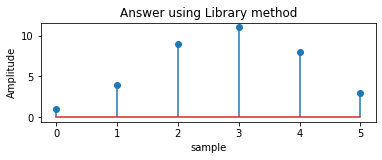

Answer:  [ 1.  4.  9. 11.  8.  3.]
/home/appledora/miniconda3/envs/gigEnv/lib/python3.8/site-packages/numpy/ma/core.py:3375: ComplexWarning: Casting complex values to real discards the imaginary part
  _data[indx] = dval
/home/appledora/miniconda3/envs/gigEnv/lib/python3.8/site-packages/numpy/core/_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/home/appledora/miniconda3/envs/gigEnv/lib/python3.8/site-packages/numpy/core/_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


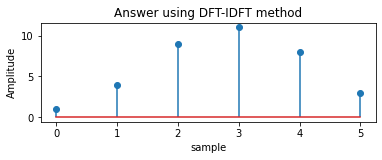

In [3]:
x = np.array([1,2,2, 1])
h = np.array([1,2,3])

N1 = np.size(x)
N2 = np.size(h)
N = N1+N2 - 1

y = np.zeros(N)
m = N-N1
n = N-N2
y_ = abs(np.convolve(x,h))
plt.subplot(212)
plt.stem(y_)
plt.xlabel('sample');
plt.ylabel('Amplitude');
plt.title('Answer using Library method');
plt.show()

#Padding zeros to x and h to make their length to N
x =np.pad(x,(0,m),'constant')
h =np.pad(h,(0,n),'constant')

X_k = DFT_iterative(x)
H_k = DFT_iterative(h)
Y_k = np.multiply(X_k, H_k)
y = IDFT_iterative(Y_k)

print("Answer: ", np.absolute(y))
plt.subplot(211)
plt.stem(y)
plt.xlabel('sample');
plt.ylabel('Amplitude');
plt.title('Answer using DFT-IDFT method');
plt.show()
# print("X_k: ",X_k)
# print("-----------------------------")
# print("H_k: ",H_k)
# print("-----------------------------")
# print("Y_k: ",Y_k)
# print("-----------------------------")
# print("-----------------------------")
# print("y_n: ",y)
# print("--------------------------------...............................----------------------------------------")

# X_ = np.fft.fft(x)
# H_ = np.fft.fft(h)
# Y_ = np.multiply(X_,H_)

# print("y_: ",y_)
# print("--------------------------------...............................----------------------------------------")
# print(np.allclose(y,y_))